In [2]:
import sys
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import quant_utils.data_moudle as dm
from dateutil.parser import parse
from quant_utils.performance import periods_performance, Performance
from quant_utils.constant import DB_CONN_JJTG_DATA
import talib as ta

In [4]:
def get_index_eod(tikcer_symbol):
    query_sql = f"""
    SELECT
        TRADE_DT,
        TICKER_SYMBOL,
        S_DQ_CLOSE
    FROM
        aindex_eod_prices
    WHERE
        1=1
        and TICKER_SYMBOL = '{tikcer_symbol}' 
    """
    return DB_CONN_JJTG_DATA.exec_query(query_sql)

In [5]:
def cal_index_bias(ticker_symbol, N):
    df = get_index_eod(ticker_symbol)
    df = df.set_index("TRADE_DT")
    df[f"{N}_MA"] = df["S_DQ_CLOSE"].rolling(N).mean()
    df[f"{N}_850STD"] = df["S_DQ_CLOSE"].rolling(N).std()
    df["diff"] = df["S_DQ_CLOSE"] - df[f"{N}_MA"]
    df["N"] = df["diff"]/df[f"{N}_850STD"]
    df["RET_250"] = df["S_DQ_CLOSE"].shift(-250)/df["S_DQ_CLOSE"]-1
    df["RET_500"] = df["S_DQ_CLOSE"].shift(-500)/df["S_DQ_CLOSE"]-1
    df["RET_750"] = df["S_DQ_CLOSE"].shift(-750)/df["S_DQ_CLOSE"]-1
    return df

<Axes: xlabel='TRADE_DT'>

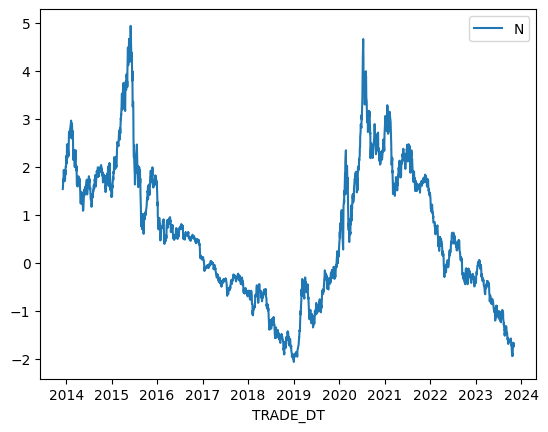

In [6]:
df = cal_index_bias('399006', 850)
df[["N"]].plot()

In [8]:
df.tail()

,TICKER_SYMBOL,S_DQ_CLOSE,850_MA,850_850STD,diff,N,RET_250,RET_500,RET_750
TRADE_DT,,,,,,,,,
2023-10-30,399006,1977.6856,2678.881780,420.535461,-701.196180,-1.667389,NaN,NaN,NaN
2023-10-31,399006,1968.2265,2678.808254,420.654366,-710.581754,-1.689229,NaN,NaN,NaN
2023-11-01,399006,1959.1272,2678.724313,420.790988,-719.597113,-1.710106,NaN,NaN,NaN
2023-11-02,399006,1939.7046,2678.571692,421.035693,-738.867092,-1.754880,NaN,NaN,NaN
2023-11-03,399006,1968.2127,2678.404570,421.289653,-710.191870,-1.685757,NaN,NaN,NaN


In [10]:
ta.KAMA(df["S_DQ_CLOSE"], 20)

TRADE_DT
2010-06-01            NaN
2010-06-02            NaN
2010-06-03            NaN
2010-06-04            NaN
2010-06-07            NaN
                 ...     
2023-10-30    1973.084468
2023-10-31    1973.014546
2023-11-01    1972.842730
2023-11-02    1971.940956
2023-11-03    1971.891568
Length: 3262, dtype: float64